In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import textwrap

import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [29]:
%load_ext lab_black

In [30]:
def get_df():
    df = pd.read_parquet("outputs/hotspots_per_fips_rolling_wc.parquet")
    return df

In [31]:
def merge_shapefile(df):
    df = df.reset_index()
    df["year"] = df["time"].dt.year
    gdf = gpd.read_file("data/WesternUSCensusTract/CensusTract2020_WesternUS.shp")
    temp = gdf.merge(df, left_on="FIPS", right_on="GEOID")
    return temp

## Mean annual wildfire PM2.5 concentration.

In [32]:
df = get_df()

In [37]:
df_desc = {
    "tmax": "Mean maximum temperature",
    "tmin": "Mean minimum temperature",
    "rhum": "Mean relative humidity",
    "pm25": "Mean PM2.5 (μg/m\u00b3)",
    "smoke_pm": "Mean wildfire PM2.5 (μg/m\u00b3)",
}

In [20]:
df = df[["time", "GEOID", "smoke_pm_non_zero"]]  # + list(df_desc.keys())]

In [ ]:
df = df.groupby("GEOID").resample("Y", on="time").mean()

In [13]:
df = df.drop(columns="GEOID")

In [15]:
temp = merge_shapefile(df)

In [16]:
df = temp

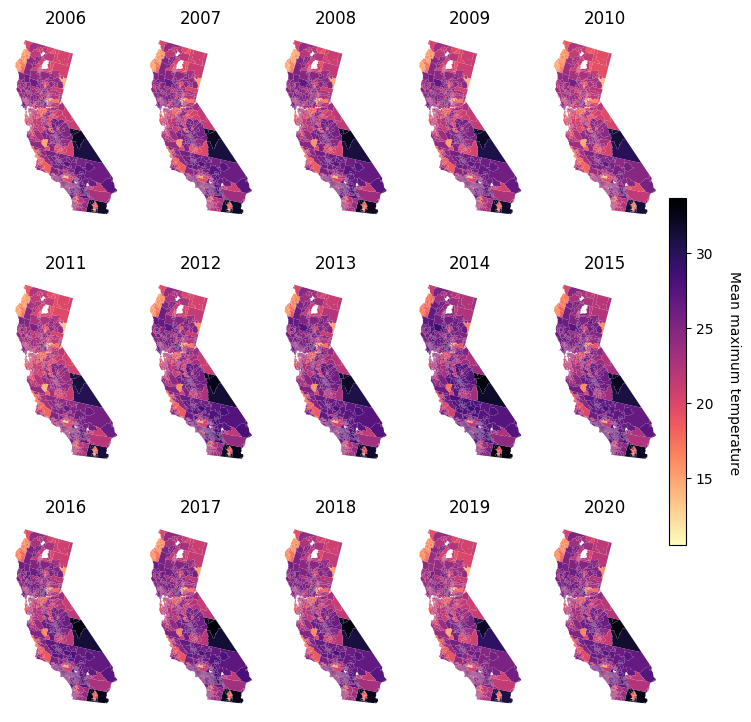

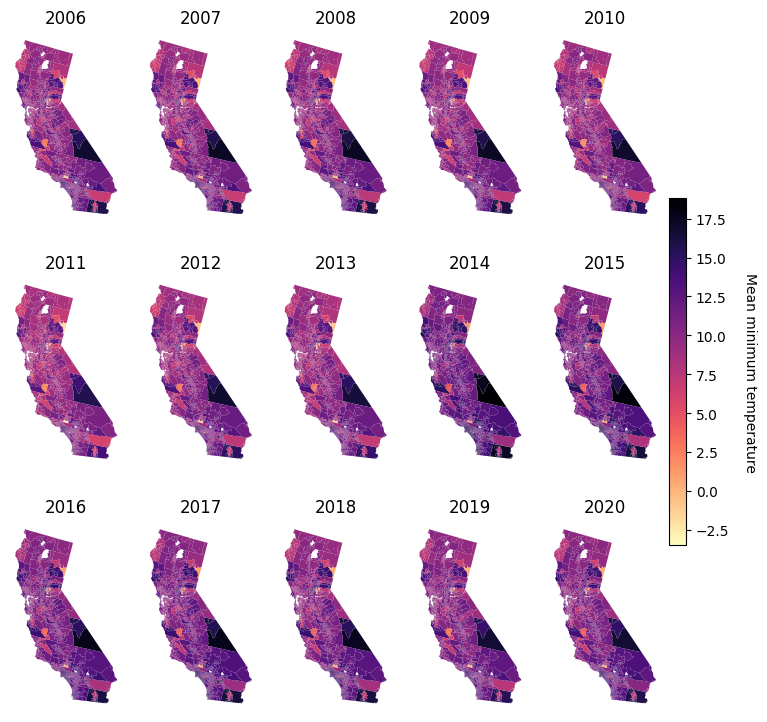

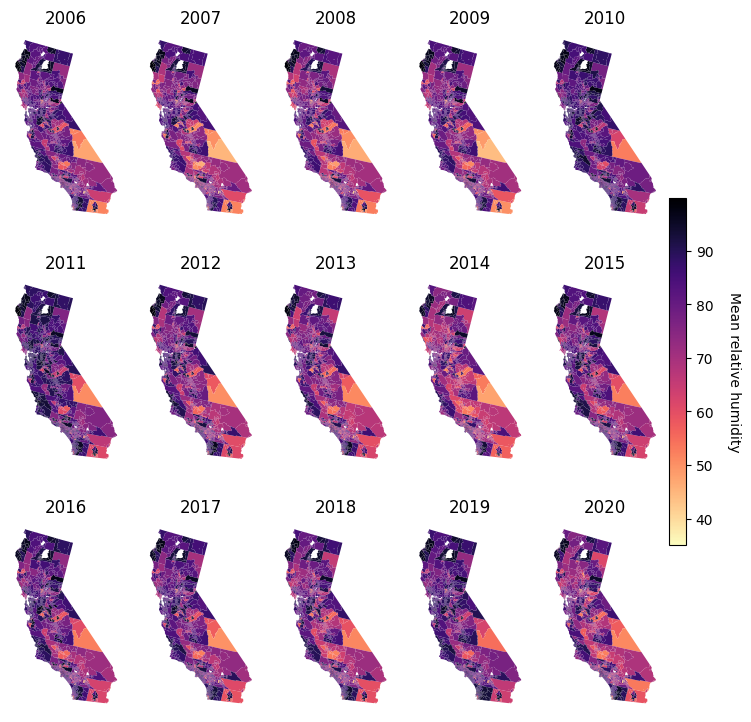

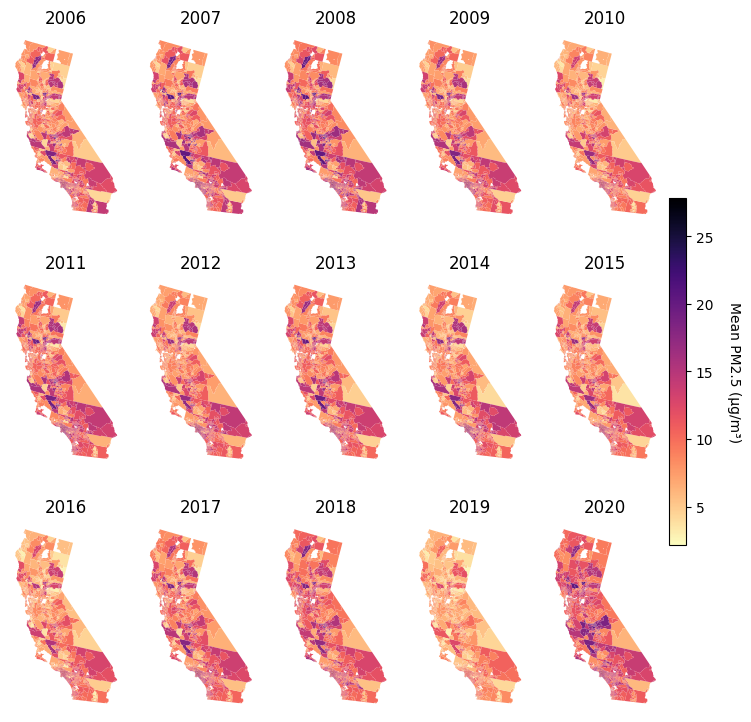

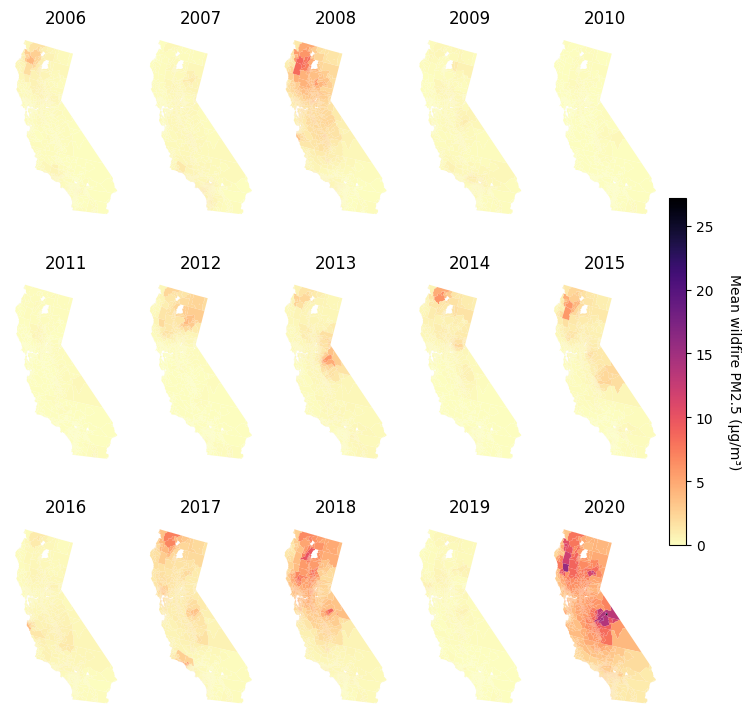

In [19]:
for exposure in df_desc.keys():
    fig, axs = plt.subplots(3, 5, figsize=(10, 9))
    axs = axs.flatten()  # Flatten the array of Axes objects into a single dimension

    # Creating a common colorbar
    vmin = df[exposure].min()
    vmax = df[exposure].max()
    cmap = "magma_r"

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])

    for i, year in enumerate(df["year"].unique()):
        data = df[df["year"] == year]  # Filter data for the specific year
        ax = axs[i]
        data.plot(column=exposure, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax, legend=False)
        ax.set_title(f"{year}")
        ax.set_axis_off()

    cbar = fig.colorbar(
        sm, ax=axs.ravel().tolist(), orientation="vertical", pad=0.01, shrink=0.5
    )
    cbar.set_label(df_desc[exposure], rotation=270, labelpad=20)

    # plt.tight_layout()
    plt.savefig("figures/mean_" + exposure + "_per_year.png")
    plt.show()

## Number of days with non-zero wildfire PM2.5 concentrations

In [8]:
df = get_df()

In [ ]:
df_non_zero = df[df["smoke_pm"] != 0]
df_non_zero = (
    df_non_zero.groupby("GEOID")[["time", "smoke_pm"]].resample("Y", on="time").count()
)

In [17]:
df_non_zero.head() 

smoke_pm
GEOID      time                
6001400100 2006-12-31        20
           2007-12-31        13
           2008-12-31        47
           2009-12-31        12
           2010-12-31        11

In [18]:
df = merge_shapefile(df_non_zero)

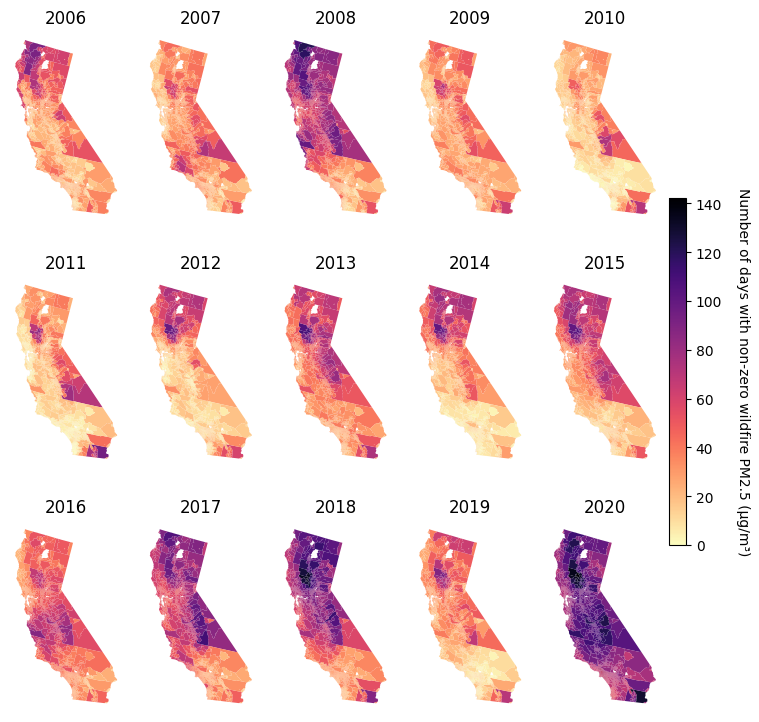

In [21]:
fig, axs = plt.subplots(3, 5, figsize=(10, 9))  # Create a 3x5 grid of subplots
axs = axs.flatten()  # Flatten the array of Axes objects into a single dimension

# Creating a common colorbar
vmin = df['smoke_pm'].min()
vmax = df['smoke_pm'].max()
cmap = 'magma_r'

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

for i, year in enumerate(df['year'].unique()):
    data = df[df['year'] == year]  # Filter data for the specific year
    ax = axs[i]
    data.plot(column='smoke_pm', ax=ax, cmap=cmap,
              vmin=vmin, vmax=vmax, legend=False)
    ax.set_title(f'{year}')
    ax.set_axis_off()

# Add a colorbar to the figure
#fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', pad=0.01)
# Add a colorbar to the figure
cbar = fig.colorbar(sm, ax=axs.ravel().tolist(), orientation='vertical', pad=0.01, shrink=0.5)
cbar.set_label('Number of days with non-zero wildfire PM2.5 (μg/m\u00b3)', rotation=270, labelpad=20)


#plt.tight_layout()
plt.savefig("figures/days_with_nonzero_wildfire_PM25_per_year.png")
plt.show()

- (A) Number of weeks with average wildfire PM2.5 > 5 μg/m3; 
- (C) Mean daily wildfire PM2.5 exposure during the peak week; 
- (D) Number of smoke wavesa; 

In [50]:
hsdict = {
    "wfday": {
        "title": "wildfire",
        "title_map": "Total days of wildfire",
    },
    "heatday": {
        "title": "heat",
        "title_map": "Total days of heat (over 95th percentile over last 5 years)",
    },
    # "coldday": {
    #     "title": "cold",
    #     "title_map": "Total cold days (under 5th percentile over last 5 years)",
    # },
    # "polluted": {
    #     "title": "pollution",
    #     "title_map": "Total days of high air pollution (over 35 μg/m\u00b3)",
    # },
    "smoke_pm_non_zero": {
        "title": "smoke_pm_non_zero",
        "title_map": r"Total days of smoke $PM_{2.5}$ (non zero)",
    },
    "smoke_pm_gt_five": {
        "title": "smoke_pm_gt_five",
        "title_map": r"Total days of smoke $PM_{2.5}$ (over 5$\mu g/m^3$)",
    },
    # "hwp": {
    #     "title": "heat_wildfire_pollution",
    #     "title_map": "Total days of heat, wildfire and pollution concurrence",
    # },
    "hws": {
        "title": "heat_wildfire_smoke_pollution_non_zero",
        "title_map": r"Total days of heat, wildfire and non-zero smoke $PM_{2.5}$ concurrence",
    },
    # "hp": {
    #     "title": "heat_pollution",
    #     "title_map": "Total days of heat and pollution concurrence",
    # },
    "hs": {
        "title": "heat_smoke_pollution_non_zero",
        "title_map": r"Total days of heat and non-zero smoke $PM_{2.5}$ concurrence",
    },
    "hw": {
        "title": "heat_wildfire",
        "title_map": "Total days of heat and wildfire concurrence",
    },
    "ws": {
        "title": "wildfire_smoke_pollution_non_zero",
        "title_map": r"Total days of wildfire & smoke $PM_{2.5}$",
    },
    "_hws": {
        "title": "heat_wildfire_pollution",
        "title_map": r"Total days of heat or wildfire or smoke $PM_{2.5}$",
    },
    "hs5": {
        "title": "heat_smoke_pollution_over_five",
        "title_map": r"Total days of heat and smoke $PM_{2.5}$ (over 5$\mu g/m^3$) concurrence",
    },
    "hws5": {
        "title": "heat_wildfire & smoke_pollution_over_five",
        "title_map": r"Total days of heat, wildfire and smoke $PM_{2.5}$ (over 5$\mu g/m^3$) concurrence",
    },
    "ws5": {
        "title": "wildfire_smoke_pollution_over_five",
        "title_map": r"Total days of wildfire and smoke $PM_{2.5}$ (over 5$\mu g/m^3$) concurrence",
    },
}

In [33]:
import plotting

hs_dict = plotting.get_hotspopt_dict()

In [34]:
hsdict.keys()

dict_keys(['wfday', 'heatday', 'smoke_pm_non_zero', 'smoke_pm_gt_five', 'hws', 'hs', 'hw', 'ws', '_hws', 'hs5', 'hws5', 'ws5'])

In [35]:
df = df.reset_index()

In [36]:
df = df[["time", "GEOID"] + list(hsdict.keys())]

In [37]:
df.head()

time        GEOID  wfday  heatday  smoke_pm_non_zero  \
0 2006-01-01  04001942600  False    False              False   
1 2006-01-01  04001942700  False    False              False   
2 2006-01-01  04001944000  False    False              False   
3 2006-01-01  04001944100  False    False              False   
4 2006-01-01  04001944201  False    False              False   

   smoke_pm_gt_five    hws     hs     hw     ws   _hws    hs5   hws5    ws5  
0             False  False  False  False  False  False  False  False  False  
1             False  False  False  False  False  False  False  False  False  
2             False  False  False  False  False  False  False  False  False  
3             False  False  False  False  False  False  False  False  False  
4             False  False  False  False  False  False  False  False  False

In [38]:
df = df.groupby("GEOID").resample("Y", on="time").sum()

In [39]:
df.head()

GEOID  \
GEOID       time                                                            
04001942600 2006-12-31  0400194260004001942600040019426000400194260004...   
            2007-12-31  0400194260004001942600040019426000400194260004...   
            2008-12-31  0400194260004001942600040019426000400194260004...   
            2009-12-31  0400194260004001942600040019426000400194260004...   
            2010-12-31  0400194260004001942600040019426000400194260004...   

                        wfday  heatday  smoke_pm_non_zero  smoke_pm_gt_five  \
GEOID       time                                                              
04001942600 2006-12-31      0       24                 29                 2   
            2007-12-31      0       27                 19                 2   
            2008-12-31      1       13                 24                 0   
            2009-12-31      0       16                 22                 3   
            2010-12-31      0       12                 18                 0   

                        hws  hs  hw  ws  _hws  hs5  hws5  ws5  
GEOID       time                                               
04001942600 2006-12-31    0   5   0   0    48    1     0    0  
            2007-12-31    0   4   0   0    42    1     0    0  
            2008-12-31    0   3   0   0    35    0     0    0  
            2009-12-31    0   2   0   0    36    0     0    0  
            2010-12-31    0   1   0   0    29    0     0    0

In [40]:
df = df.drop(columns="GEOID")

In [41]:
temp = merge_shapefile(df)

In [42]:
df = temp

<Figure size 640x480 with 0 Axes>

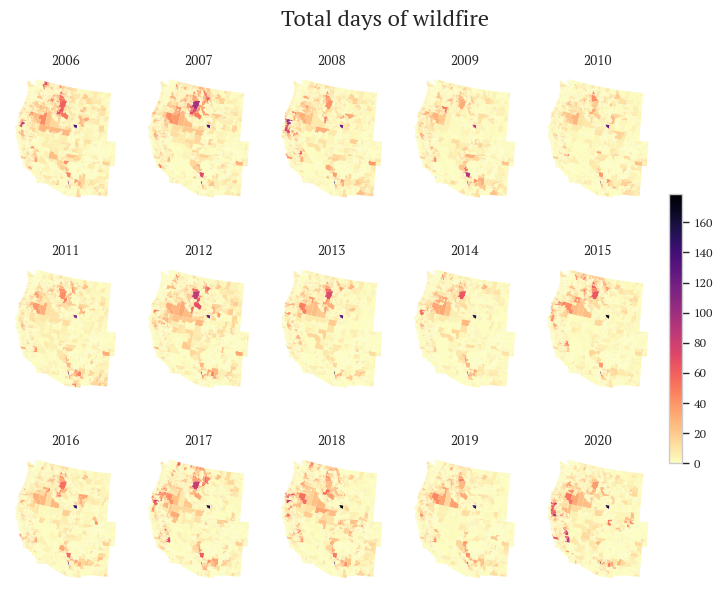

<Figure size 640x480 with 0 Axes>

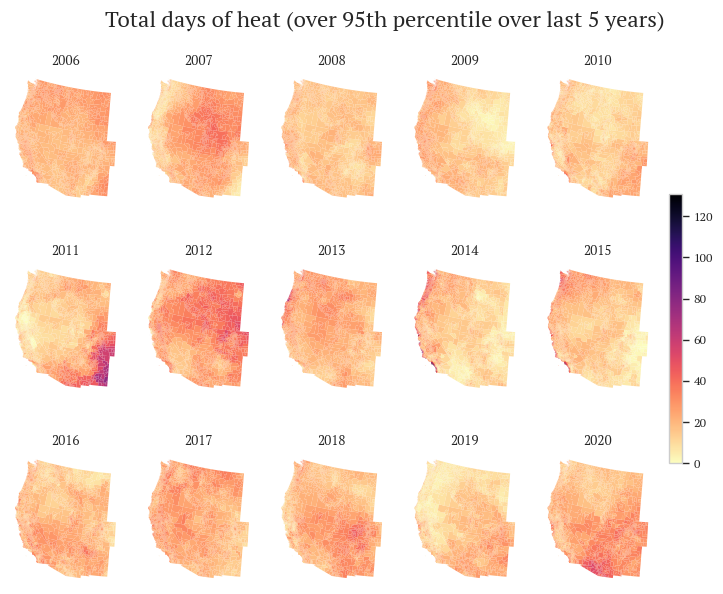

<Figure size 640x480 with 0 Axes>

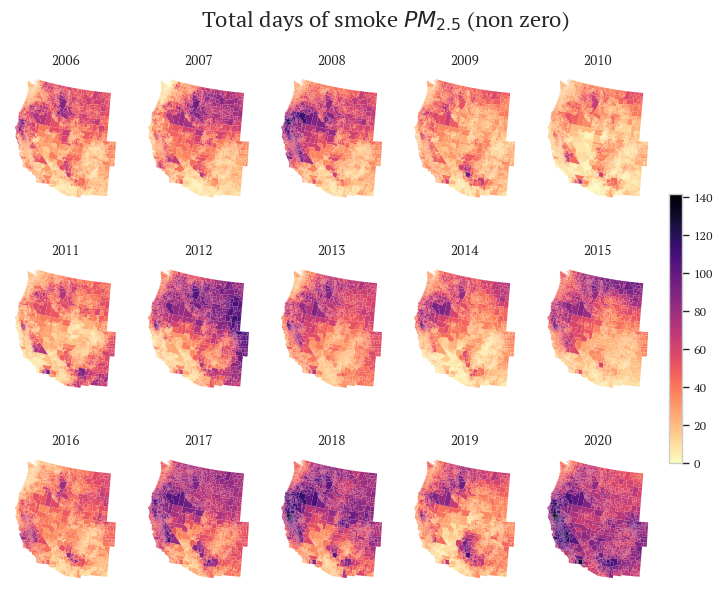

<Figure size 640x480 with 0 Axes>

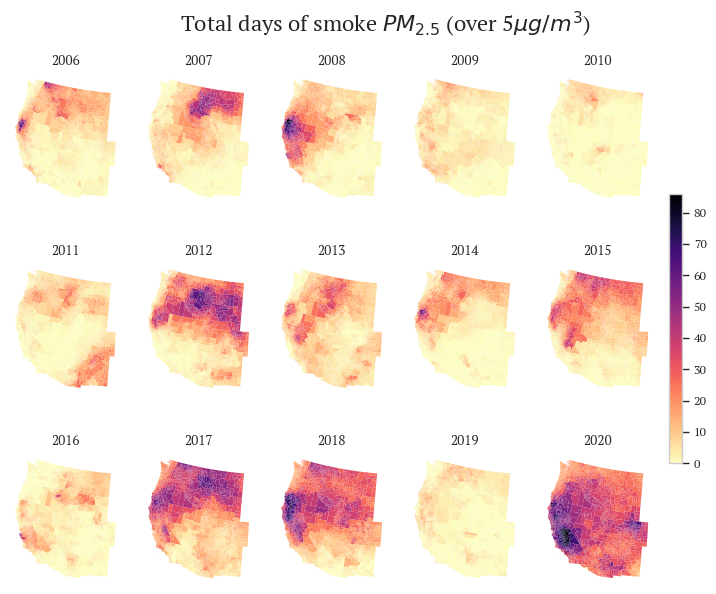

<Figure size 640x480 with 0 Axes>

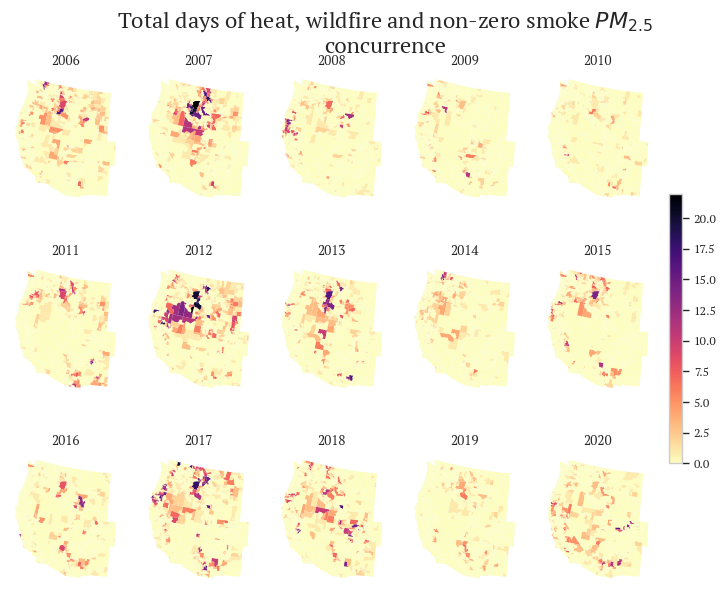

<Figure size 640x480 with 0 Axes>

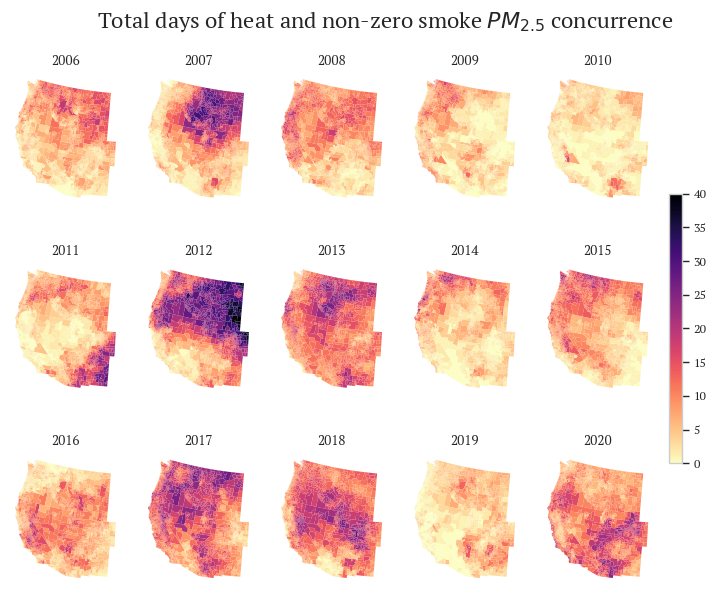

<Figure size 640x480 with 0 Axes>

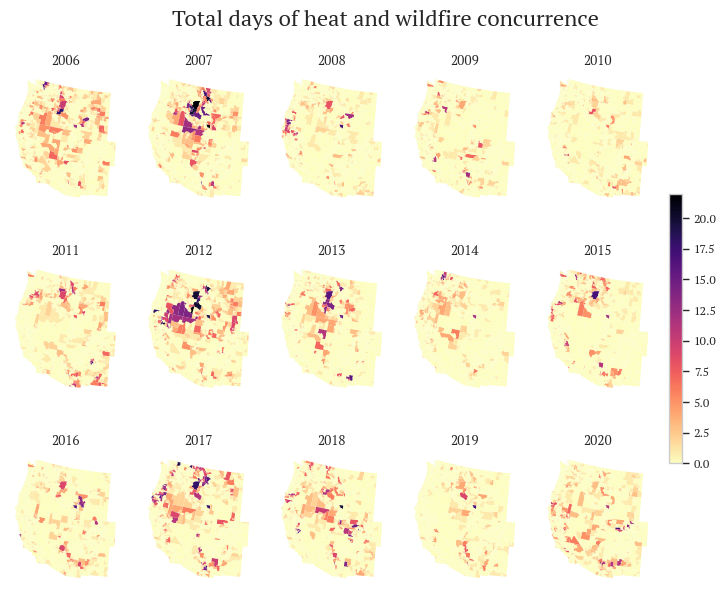

<Figure size 640x480 with 0 Axes>

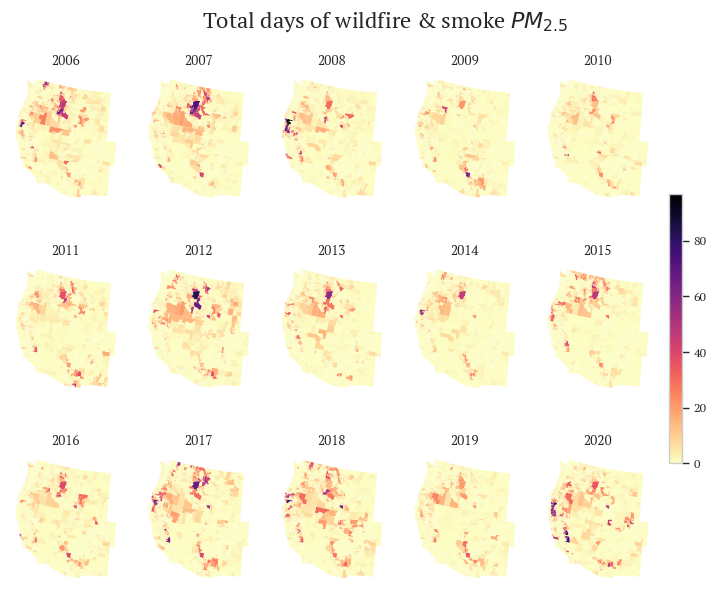

<Figure size 640x480 with 0 Axes>

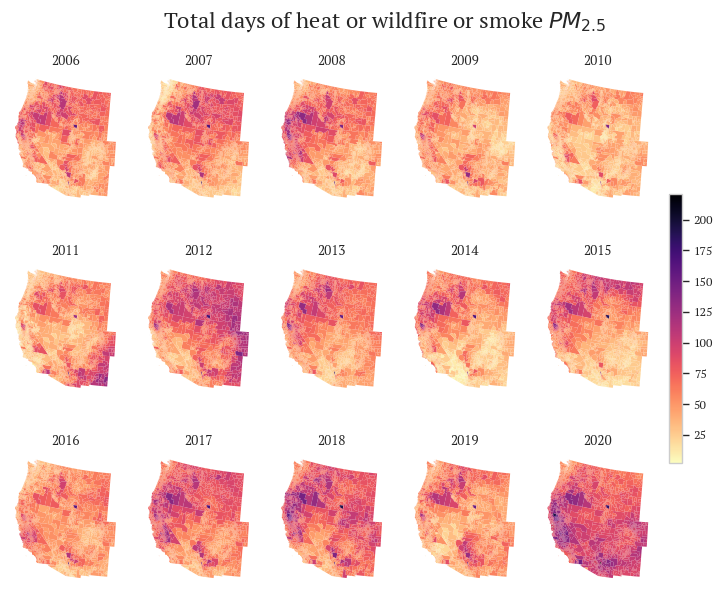

<Figure size 640x480 with 0 Axes>

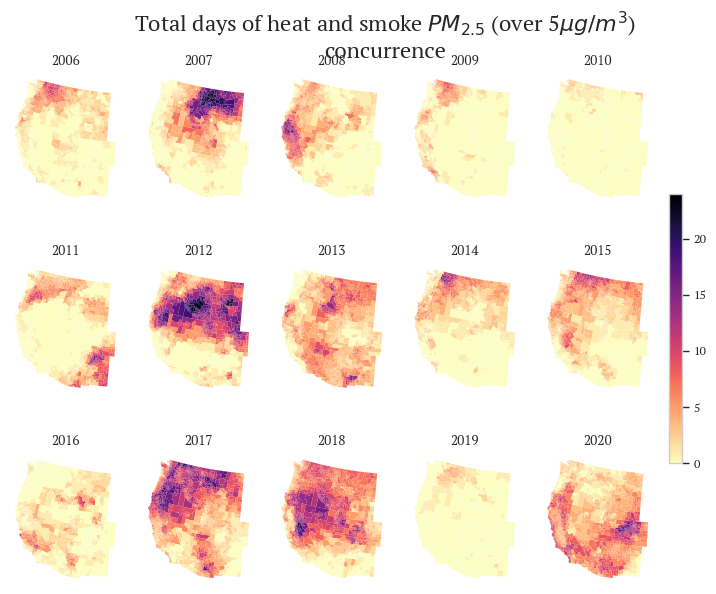

<Figure size 640x480 with 0 Axes>

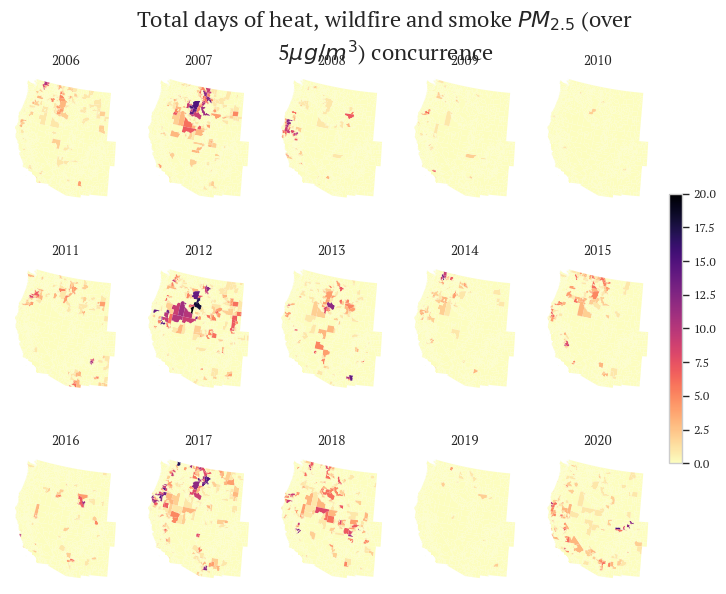

<Figure size 640x480 with 0 Axes>

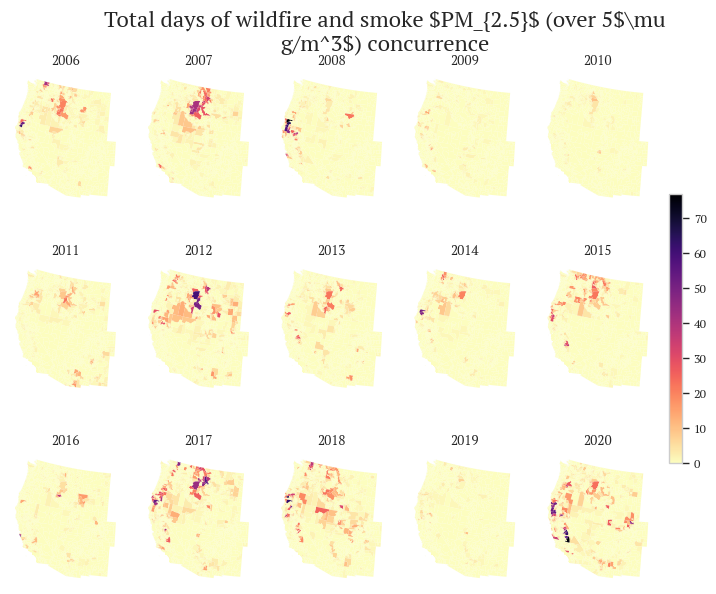

In [51]:
for exposure in hsdict.keys():
    plt.clf()  # clear figure
    fig, axs = plt.subplots(3, 5, figsize=(10, 7))
    axs = axs.flatten()  # Flatten the array of Axes objects into a single dimension

    # Creating a common colorbar
    vmin = df[exposure].min()
    vmax = df[exposure].max()
    cmap = "magma_r"

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])

    for i, year in enumerate(df["year"].unique()):
        data = df[df["year"] == year]  # Filter data for the specific year
        ax = axs[i]
        data.plot(
            column=exposure,
            ax=ax,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            legend=False,
            linewidth=0,
        )
        ax.set_title(f"{year}")
        ax.set_axis_off()

    cbar = fig.colorbar(
        sm, ax=axs.ravel().tolist(), orientation="vertical", pad=0.02, shrink=0.5
    )
    wrapped_title = textwrap.fill(hsdict[exposure]["title_map"], 60)
    fig.suptitle(wrapped_title, fontsize=16, fontweight="bold", y=0.95)

    # cbar.set_label(hsdict[exposure]["title_map"], rotation=270, labelpad=20)

    # plt.tight_layout()
    plt.savefig("figures/sum_" + hsdict[exposure]["title"] + "_per_year.png")
    plt.show()